In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score

In [4]:
cd D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-6 Python SVM Classification Red Wine Quality Analysis

D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-6 Python SVM Classification Red Wine Quality Analysis


# Part-1: Data Exploration and Pre-processing


In [8]:
# 1) load the given dataset
df=pd.read_csv("Python_Project_6_SVM.csv")
df.head()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [7]:
# 2) print the information from dataset
df.info

<bound method DataFrame.info of       Quality_Category  volatileacidity  citricacid  residualsugar  chlorides  \
0                    0             0.30        0.34            1.6      0.049   
1                    0             0.23        0.32            8.5      0.058   
2                    0             0.28        0.40            6.9      0.050   
3                    0             0.32        0.16            7.0      0.045   
4                    0             0.27        0.36           20.7      0.045   
...                ...              ...         ...            ...        ...   
4889                 0             0.21        0.29            1.6      0.039   
4890                 0             0.32        0.36            8.0      0.047   
4891                 0             0.24        0.19            1.2      0.041   
4892                 1             0.29        0.30            1.1      0.022   
4893                 0             0.21        0.38            0.8      0.020

In [9]:
# 3) describe the dataset
df.describe()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.216387,0.278335,0.334146,6.391582,0.045773,35.311606,138.368615,0.994048,0.489904,10.514610
std,0.411823,0.100801,0.121047,5.071695,0.021855,17.019553,42.498278,0.003007,0.114153,1.230665
min,0.000000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987000,0.220000,8.000000
25%,0.000000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.992000,0.410000,9.500000
50%,0.000000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.994000,0.470000,10.400000
75%,0.000000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996000,0.550000,11.400000
max,1.000000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.039000,1.080000,14.200000


In [10]:
# 4) print the column names from dataset
df.columns

Index(['Quality_Category', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

<AxesSubplot:>

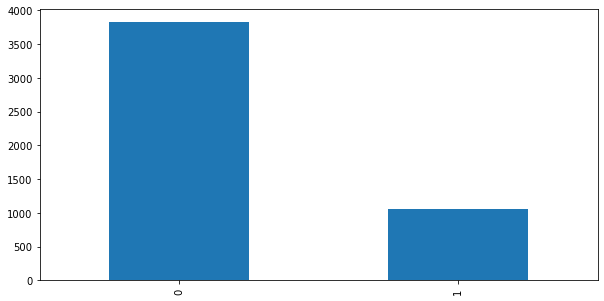

In [21]:
# 5) display the barchart of Quality_Category value counts
df.Quality_Category.value_counts().plot(kind='bar',figsize=(10,5))

<AxesSubplot:xlabel='Quality_Category', ylabel='count'>

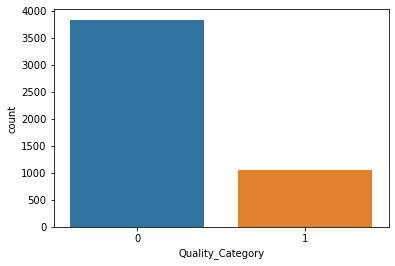

In [23]:
sns.countplot("Quality_Category",data=df)

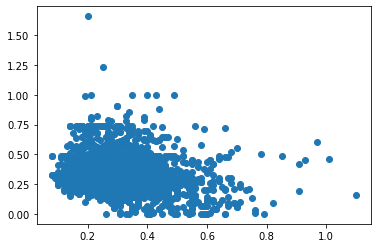

In [34]:
# 6) Display scatter plot between volatileacidity & citricacid
plt.xlabel="volatileacidity"
plt.ylabel="citricacid"
plt.scatter("volatileacidity","citricacid",data=df)

In [29]:
df["volatileacidity"].unique()

array([0.3 , 0.23, 0.28, 0.32, 0.27, 0.22, 0.18, 0.16, 0.42, 0.17, 0.48,
       0.34, 0.31, 0.66, 0.26, 0.67, 0.25, 0.24, 0.14, 0.12, 0.39, 0.33,
       0.45, 0.46, 0.19, 0.2 , 0.21, 0.38, 0.47, 0.35, 0.54, 0.43, 0.44,
       0.36, 0.13, 0.41, 0.49, 0.37, 0.6 , 0.29, 0.53, 0.15, 0.57, 0.4 ,
       0.69, 0.5 , 0.64, 0.52, 0.58, 0.59, 0.55, 0.1 , 0.91, 0.51, 0.62,
       0.56, 0.11, 0.71, 0.08, 0.68, 0.61, 0.85, 1.01, 0.76, 0.93, 0.7 ,
       0.82, 0.97, 0.74, 0.78, 0.75, 0.09, 0.73, 0.65, 1.1 , 0.63, 0.79])

In [30]:
df["citricacid"].unique()

array([0.34, 0.32, 0.4 , 0.16, 0.36, 0.43, 0.41, 0.37, 0.62, 0.38, 0.04,
       0.42, 0.14, 0.48, 0.35, 0.39, 0.2 , 0.23, 0.26, 0.27, 0.31, 0.25,
       0.29, 0.33, 0.59, 0.15, 0.24, 0.07, 0.03, 0.13, 0.28, 0.46, 0.3 ,
       0.61, 0.63, 0.66, 0.54, 0.5 , 0.  , 0.47, 0.56, 0.22, 0.67, 0.18,
       0.45, 0.44, 0.88, 0.21, 0.08, 0.49, 0.58, 0.7 , 0.6 , 0.51, 0.1 ,
       0.19, 0.12, 0.09, 0.53, 0.02, 0.65, 0.17, 0.71, 0.06, 0.68, 0.72,
       0.69, 1.66, 0.57, 0.05, 0.52, 1.  , 0.01, 0.74, 0.81, 0.55, 0.64,
       0.73, 0.99, 0.78, 0.79, 0.82, 0.8 , 1.23, 0.86, 0.11, 0.91])

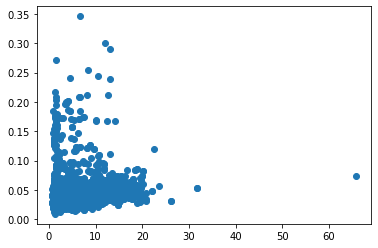

In [35]:
# 7) Display scatter plot between residualsuger & chlorides
plt.xlabel="residualsugar"
plt.ylabel="chlorides"
plt.scatter("residualsugar","chlorides",data=df)
plt.show()

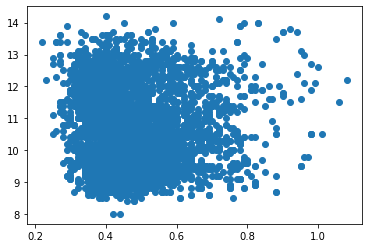

In [43]:
# 8) Display scatterplot between sulphates and alcohol
plt.xlabel="sulphates"
plt.ylabel="alcohol"

plt.scatter(df["sulphates"],df["alcohol"])
plt.show()

array([[<AxesSubplot:title={'center':'Quality_Category'}>,
        <AxesSubplot:title={'center':'volatileacidity'}>,
        <AxesSubplot:title={'center':'citricacid'}>],
       [<AxesSubplot:title={'center':'residualsugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'freesulfurdioxide'}>],
       [<AxesSubplot:title={'center':'totalsulfurdioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

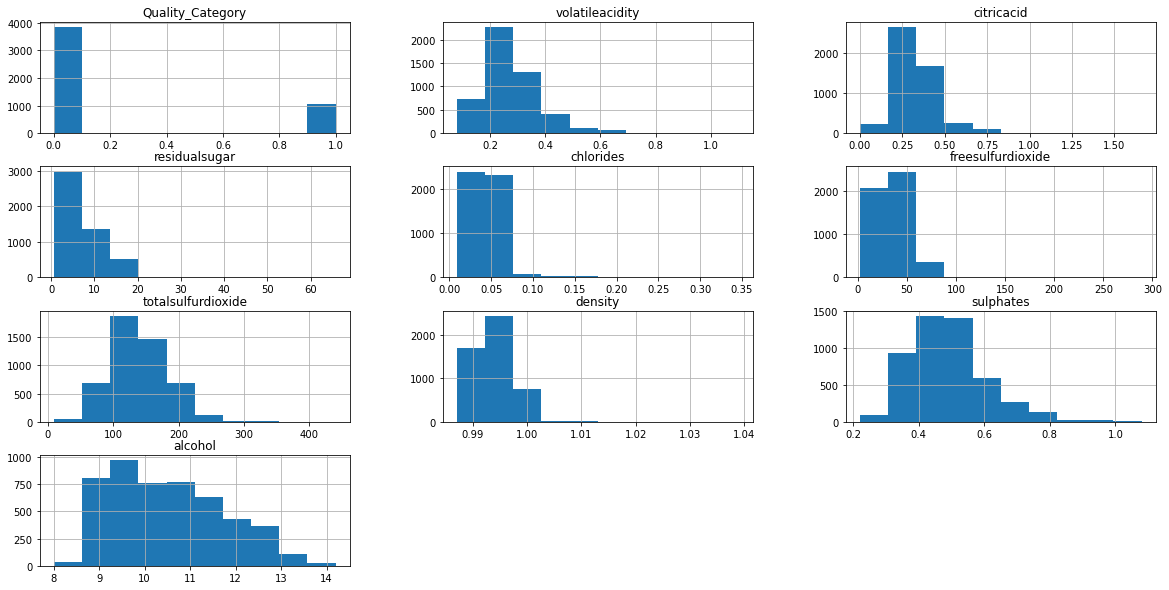

In [41]:
# 9) Display histplot of dataset
df.hist(figsize=(20,10))

In [45]:
# 10) find the null values
df.isnull().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

In [46]:
# 11) create features and target data

In [50]:
x=df.drop("Quality_Category",axis=1)
y=df["Quality_Category"]

In [51]:
x.shape

(4894, 9)

In [54]:
y.shape

(4894,)

# Part-2: Working with Models


In [56]:
# 1) split into training and testing
from sklearn.model_selection import train_test_split

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [130]:
x_train
x_train.shape

(3915, 9)

In [131]:
x_test
x_test.shape

(979, 9)

In [132]:
y_train
y_train.shape

(3915,)

In [133]:
y_test
y_test.shape

(979,)

In [134]:
# 2) apply support vector machine
from sklearn.svm import SVC

In [135]:
svc=SVC()

In [136]:
svc.fit(x_train,y_train)

SVC()

In [137]:
# 3) show training score
svc.score(x_train,y_train)

0.7787994891443167

In [138]:
# 4) show the testing score
svc.score(x_test,y_test)

0.8028600612870276

In [139]:
y_predicted=svc.predict(x_test)
# print(y_predicted)

In [140]:
y_test

4028    0
1755    0
3833    0
2078    0
3382    1
       ..
1824    0
2818    0
3127    0
230     0
4483    0
Name: Quality_Category, Length: 979, dtype: int64

In [141]:
# 5) show the accuracy
accuracy_score(y_test,y_predicted)

0.8028600612870276

In [143]:
# 6) create a new model and try it with parameter c = 100
svc1=SVC(C=100)
# svc1=SVC(C=2)

In [144]:
svc1.fit(x_train,y_train)

SVC(C=100)

In [145]:
svc1.score(x_train,y_train)

0.7787994891443167

In [146]:
svc1.score(x_test,y_test)

0.8028600612870276

In [147]:
y1_predicted=svc1.predict(x_test)

In [148]:
accuracy_score(y_test,y1_predicted)

0.8028600612870276

# WITH RBF KERNEL

In [149]:
rbf_svc=SVC(kernel='rbf')

In [150]:
rbf_svc.fit(x_train,y_train)

SVC()

In [153]:
y_rbf_predict=rbf_svc.predict(x_test)

In [151]:
rbf_svc.score(x_train,y_train)

0.7787994891443167

In [154]:
rbf_svc.score(x_test,y_test)

0.8028600612870276

In [155]:
accuracy_score(y_test,y_rbf_predict)

0.8028600612870276

In [159]:
import warnings
warnings.filterwarnings("ignore")

In [160]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       786
           1       0.00      0.00      0.00       193

    accuracy                           0.80       979
   macro avg       0.40      0.50      0.45       979
weighted avg       0.64      0.80      0.72       979

